In [21]:
### IMPORTING LIBRARIES ###
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import os
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [22]:
GFRIEND_2020 = pd.read_csv('GFRIEND_2020.csv')
GFRIEND_historical = pd.read_csv('GFRIEND_DATA.csv')

In [23]:
GFRIEND_2020.describe()
GFRIEND_2020 = GFRIEND_2020.drop_duplicates(subset=['name'])

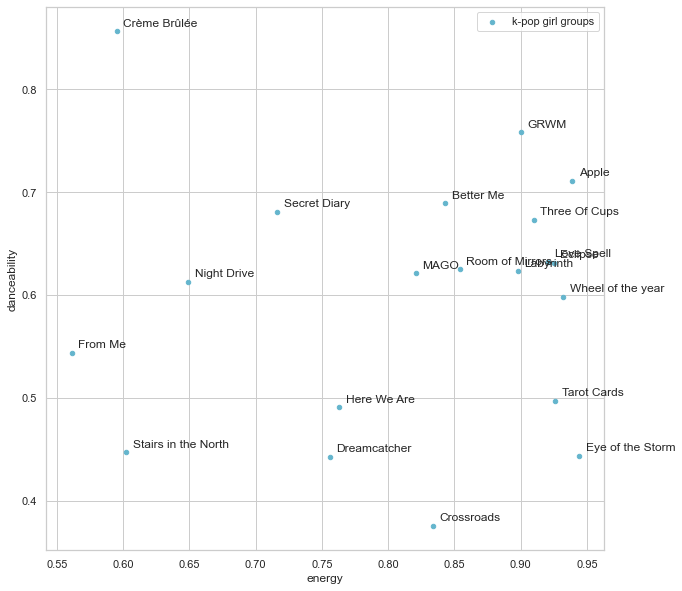

In [24]:
GFRIEND_2020.plot.scatter(x="energy", y="danceability", c='c',label="k-pop girl groups", figsize=(10,10))
for index in GFRIEND_2020.index:
    plt.text(x=GFRIEND_2020['energy'][index] + .005,
         y=GFRIEND_2020['danceability'][index] + .005,
         s=GFRIEND_2020['name'][index])

# ????

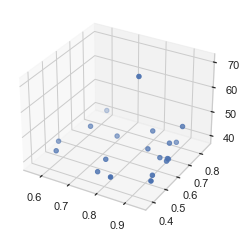

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(GFRIEND_2020['energy'], GFRIEND_2020['danceability'], GFRIEND_2020['popularity'], c = 'b', marker='o')

In [26]:
GFRIEND_historical.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.0,106.00000
mean,0.625443,0.837057,5.424528,-3.402038,0.603774,0.055929,0.167561,0.094818,0.192483,0.583047,122.103575,200054.386792,4.0,37.09434
std,0.106125,0.113356,2.894817,1.696177,0.491436,0.033493,0.166016,0.241338,0.140371,0.180500,22.546383,38104.240534,0.0,9.74389
min,0.292000,0.369000,0.000000,-10.732000,0.000000,0.025700,0.000287,0.000000,0.036500,0.051100,72.427000,60361.000000,4.0,22.00000
25%,0.588500,0.798500,4.000000,-4.384750,0.000000,0.037100,0.038100,0.000000,0.090200,0.487000,109.214000,195700.250000,4.0,31.00000
50%,0.641500,0.869500,6.000000,-3.015000,1.000000,0.047750,0.132000,0.000000,0.136500,0.585500,119.882500,207008.000000,4.0,35.50000
75%,0.695750,0.911750,7.000000,-2.118500,1.000000,0.061900,0.220500,0.000000,0.273000,0.689000,125.789000,216337.500000,4.0,42.00000
max,0.856000,0.978000,11.000000,-0.944000,1.000000,0.268000,0.717000,0.926000,0.908000,0.950000,199.705000,294254.000000,4.0,71.00000


In [30]:
GFRIEND_historical = GFRIEND_historical.drop_duplicates(subset=["acousticness","danceability","energy","speechiness","liveness","valence"])
GFRIEND_historical['year'] = GFRIEND_historical.release_date.str[:4]
GFRIEND_historical.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.00000,99.000000,99.000000,99.000000,99.000000,99.0,99.000000
mean,0.624040,0.834525,5.454545,-3.416444,0.616162,0.056864,0.168859,0.09733,0.188039,0.585677,122.315788,201007.181818,4.0,37.313131
std,0.108863,0.115602,2.946020,1.699205,0.488794,0.034400,0.168017,0.24658,0.140589,0.184871,23.200819,37070.129462,0.0,9.748518
min,0.292000,0.369000,0.000000,-10.732000,0.000000,0.025700,0.000287,0.00000,0.036500,0.051100,72.427000,60361.000000,4.0,22.000000
25%,0.583000,0.792000,4.000000,-4.343500,0.000000,0.037050,0.038500,0.00000,0.088350,0.485500,108.483000,195714.500000,4.0,31.000000
50%,0.642000,0.867000,6.000000,-3.021000,1.000000,0.048100,0.136000,0.00000,0.129000,0.595000,119.965000,207013.000000,4.0,37.000000
75%,0.695500,0.911500,7.500000,-2.203500,1.000000,0.063100,0.222000,0.00000,0.266000,0.700000,125.540000,216477.500000,4.0,42.000000
max,0.856000,0.978000,11.000000,-0.944000,1.000000,0.268000,0.717000,0.92600,0.908000,0.950000,199.705000,294254.000000,4.0,71.000000


[]

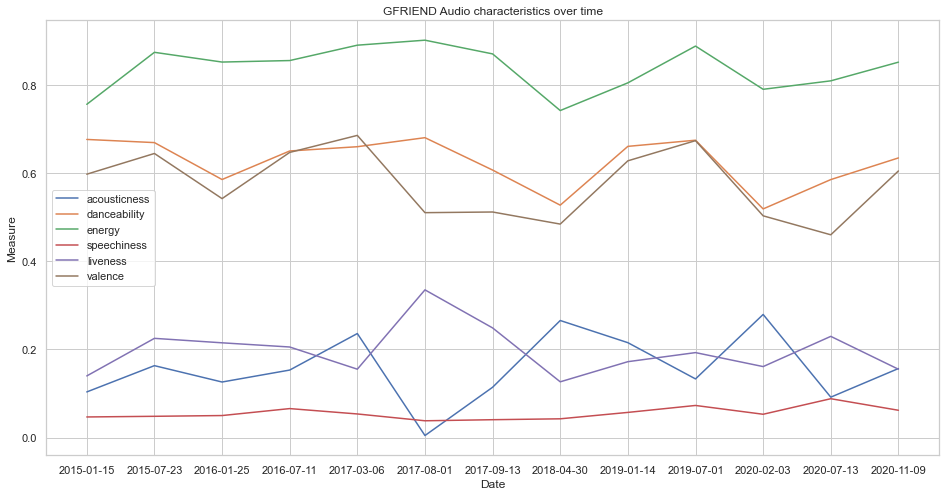

In [28]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = GFRIEND_historical.groupby("release_date")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set(title='GFRIEND Audio characteristics over time', 
    xlabel='Date',
    ylabel='Measure')
plt.plot()

[]

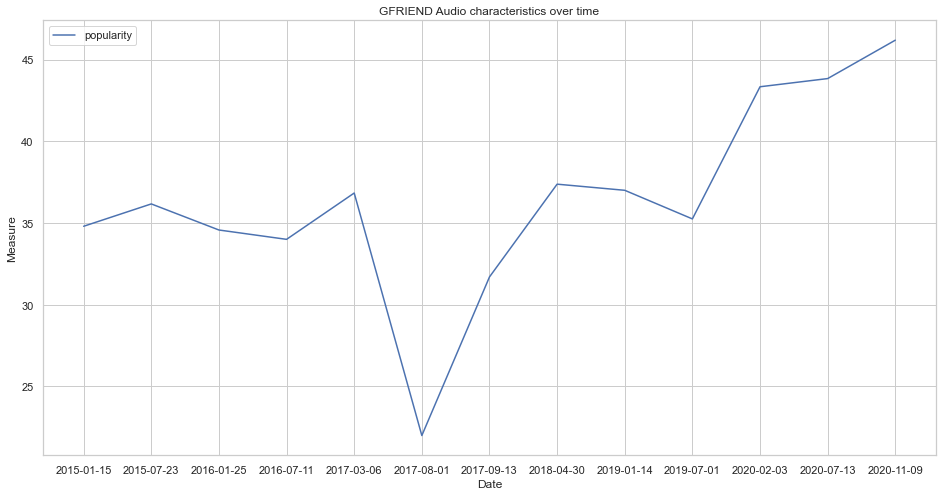

In [29]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["popularity"]
for col in columns:
    x = GFRIEND_historical.groupby("release_date")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set(title='GFRIEND Audio characteristics over time', 
    xlabel='Date',
    ylabel='Measure')
plt.plot()

[]

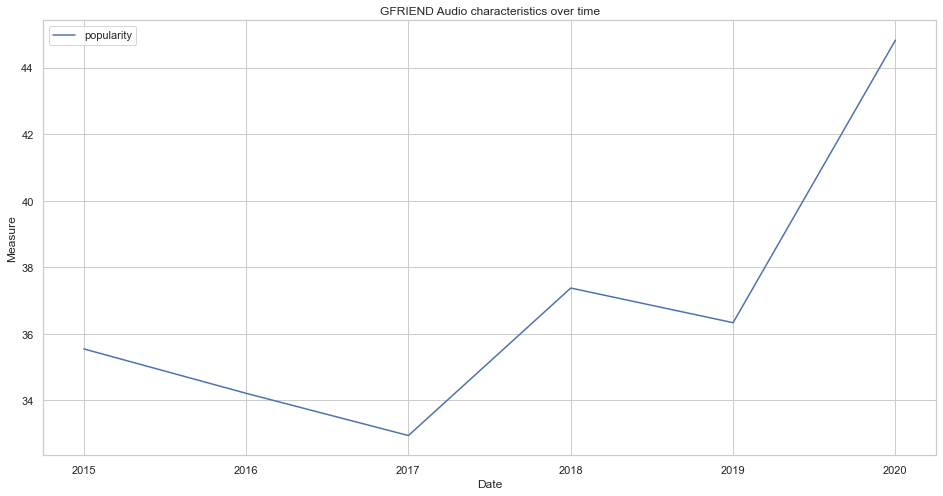

In [31]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["popularity"]
for col in columns:
    x = GFRIEND_historical.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set(title='GFRIEND Audio characteristics over time', 
    xlabel='Date',
    ylabel='Measure')
plt.plot()

Skewness: -1.753754
Kurtosis: 3.662712


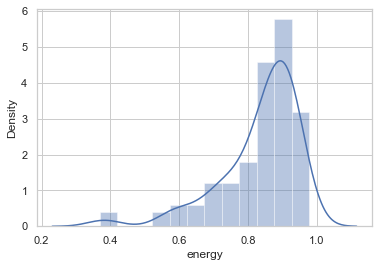

In [45]:
sns.distplot(GFRIEND_historical['energy'])
print("Skewness: %f" % GFRIEND_historical['energy'].skew())
print("Kurtosis: %f" % GFRIEND_historical['energy'].kurt())